# Modeling the Russian Mir
## Land and labor allocations on a commune:a general equilibrium framework
**Jonathan Conning** (Hunter College and The Graduate Center, CUNY) and **Aleksandr Michuda** (University of California, Davis)

In [1]:
%reload_ext watermark
%watermark -u -n -t 

Last updated: Wed Sep 14 2016 10:28:21 


This notebooks extends the general equilibrium farm distribution models found in the [geqfarm](https://github.com/jhconning/geqfarm) module o also include the possibility that the 'smallholder' sector is represented by a commune, which we model with the historical Russian Mir in mind.

### Preliminaries

As a benchmark we start with a simplified statement of the problem with just two types of household group -- landlords and `peasants' and a very simple discrete distribution of farming skills.  We later generalize.

The economy has $\overline{T}$ units of cultivable land and $\overline{L}$ households with one unit of labor each. The economy-wide land to labor ratio is therefore $\overline{t}=\overline{T}/\overline{L}$. 
	
Household are indexed $i=1..$ $\overline{L}$ and each household has a non-traded farming skill level $s_{i}$ drawn from a known distribution $Z$. There is also an initial distribution of property rights over land. We'll make more flexible assumptions later but for now suffice to say that there is a group of "landlord" households (fraction $\lambda $ of the total) who together own fraction $\theta $ of the land endowment. The remaining fraction  $1-\theta$ is controlled by the smallholder sector (possibly organized into a commune). 

In some scenarios below landlords will distort allocations by colluding to coordinate their factor market demands and supplies as if they were a single landlord monopoly `cartel'.   

Depending on the scenario the commune also may or may not create its own distortions, principally by enforcing land allocationsto households in the commune based on an **egalitarian norm** (e.g. proportionate to demographic characteristics) rather than based on each smallholder's skill or productivity.

As the $\lambda \overline{L}$ landlord households own $\theta \overline{T}$ units of land, peasant households own the remaining $(1-\theta )\overline{T}$ units. The average non-landlord household therefore owns $\frac{(1-\theta )\overline{t}}{(1-\lambda )}$ units and, for the moment, all peasant households have the same initial land endowment. Under these assumptions it can be shown that the land Gini coefficient is exactly $\left[ \theta -\lambda \right] .$
	
A single tradable good such as corn is produced and consumed in the economy at a unity price fixed by trade with the world market. \ Households maximize utility from consumption subject to household income from farm production plus net factor sales.  
	
All peasant households have access to the same production technology represented by a standard concave production function $\widehat{F}(T,L,s)$ assumed for now to be linearly homogenous in its three arguments: land $T,$labor $L$, and a third factor which we label $s.$This last factor is assumed to be a non-traded factor that captures farming skill or labor supervision ability$.$  

In the illustrative simulations below we assume a Cobb-Douglas form
$$\widehat{F}(T,L,s)=s^{1-\gamma }\cdot \left[ T^{\alpha }L^{1-\alpha }\right] ^{\gamma }$$

#### The Economy Class

The python code relies on object oriented programming ideas.  We first define an Economy class. An instance of an Economy is an object with atributes describing the technology as well as an initial distribution of land and non-traded skills. The Economy class also includes methods for solving for and describing equilibrium allocations under different scenarios.  

Most of the code for this project is in the **geqfarm** module which includes these definitions. As this module is in a parent folder we add that source folder to the pythonpath so the import works.

In [13]:
import sys
sys.path.append('../')
from geqfarm import *

In [14]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10, 8)

np.set_printoptions(precision=4)
%matplotlib inline

In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Model Scenarios

We classify the scenarios we want to analyze into four possible scenarios depending on whether there are distortions in the way the landlord and/or the smallholder class allcates resources. On the landlord side we first consider **market power distortions** while on the smallholder side we mainly consider distortions due to the possible presence of a commune authority that allocates land to smallholder households according to an **egalitarian norm**, for example according to the demographic characteristics rather than on farming skill/productivity of the household.

![title](scenarios.png)

**EE**: Landlord and smallholder groups allocate resources efficiently, so marginal products will be equalized across farms. This scenario would include perfect competition with no market imperfections as well as the 'efficient exploitation' scenario described below. 

**DE**:  Here the landlord faces a competitive fringe (who allocate resources efficiently within their subeconomy) but the landlord is able to exercise some monopoly-cum-monoposony power through land and labor markets due to their concentrated ownership of land and/or farming skill. This is the 'Latifundia Economics' equilibrium.  It's possible to interpret the smallholder sector as a commune under the assumption that the commune allocates resources efficiently.  We do not consider bilateral monopoly (where the commune acts as a syndicate in strategic competition with the landlord) although this would be an interesting extension.

**ED**: In this scenario we imagine a commune embedded in an otherwise competitive economy. There distortions with...

**DD**: ...

To start simple assume that there just N=5 farmers each with a skill level normalized to 1.  

In [17]:
N = 5

### The EE scenario (e.g. perfect competition)

The following contrived example helps to starkly highlight the mechanisms behind the factor-market power distorted equilibrium.

Now create an economy and change a few parameters from their default.  The $\gamma$ parameter which measures the degree of homogeneity in production is purposefully set very high.. We are very close to assuming constant returns to scale (but setting it just below 1 is needed to make sure the size-distribution remains determinate).

In [18]:
E = Economy(N)    # an instance takes N length as parameter
s = np.ones(N)    # skill distribution in the economy
E.ALPHA = 0.5
E.GAMMA = 0.90

The Economy has default resource endowment:

In [19]:
E.TBAR,E.LBAR

(100, 100)

So as expected the efficient (competitive) resource allocation has every farmer operating a farm of equal unit size.  The smallhold_eq method gives the competitive (efficient) allocation for a subeconomy with XE = (TE,LE) endowments and skill distribution s. It returns a named tuple with equilibrium facor prices and X=[T,L] allocations.

If XE and s are those of the entire economy then we've found the economywide competitive allocation.  

In [20]:
Xc = E.smallhold_eq([E.TBAR,E.LBAR],s)
Xc

result(w=array([ 0.3335,  0.3335]), X=array([[ 20.,  20.,  20.,  20.,  20.],
       [ 20.,  20.,  20.,  20.,  20.]]))

### The DE scenario (Latifundia)

In [21]:
(Xrc,Xr,wc,wr) = scene_print(E,10, detail=True)

Running 10 scenarios...

Assumed Parameters
ALPHA  : 0.5 GAMMA  : 0.9 H      : 0.0 LAMBDA : 0.2
LBAR   : 100 N      : 5 TBAR   : 100 s      : [ 1.  1.  1.  1.  1.]

Effcient:[ Trc, Lrc]      [rc,wc]       w/r    F( )    [r*Tr]  [w*Lr] 
        [ 20.00, 20.00]  [0.33,0.33]   1.00  | 14.82    6.67     6.67 

Theta  [ Tr, Lr ]      [rM,wM]        w/r  | F()   [T_hire]  [T_sale] [L_hire]
 0.00  [ 17.56, 20.69] [ 0.33, 0.34]  1.04 | 14.19     5.74     0.00     7.03  
 0.10  [ 18.57, 20.17] [ 0.33, 0.34]  1.02 | 14.39     6.13     3.30     6.79  
 0.20  [ 20.00, 20.00] [ 0.33, 0.33]  1.00 | 14.82     6.67     6.67     6.67  
 0.30  [ 21.95, 20.19] [ 0.34, 0.33]  0.98 | 15.52     7.41    10.13     6.67  
 0.40  [ 24.58, 20.78] [ 0.34, 0.33]  0.95 | 16.55     8.43    13.72     6.79  
 0.50  [ 28.15, 21.88] [ 0.35, 0.32]  0.92 | 18.00     9.85    17.50     7.04  
 0.60  [ 33.08, 23.67] [ 0.36, 0.32]  0.88 | 20.05    11.92    21.61     7.47  
 0.70  [ 40.17, 26.55] [ 0.38, 0.31]  0.81 | 23.05   

..\geqfarm.py:34: RuntimeWarning: invalid value encountered in double_scalars
  MPT = self.ALPHA*self.GAMMA*self.prodn(X,  s)/X[0]
..\geqfarm.py:55: RuntimeWarning: invalid value encountered in greater
  profitable = (self.profits(X, s, w) > 0)


Thus far we've said nothing of the ownership of land or labor.  Let's assume every household has one unit of labor but that the 'landlord' class (which WLOG we index to be the last skill group s[-1]) owns fraction $\theta$ of the land.  Assuming a uniform distribution of households across skills every skill group has Lbar/N households, and so there are that many landlords who act as a single cartel.

The following code is useful for printing and plotting out equilibria as a function of initial landlords' land ownership share.

We pass our economy instance to the scenarios function and it solves for competitive and market-power equilibria (at different levels of theta) and prints out the results.

Let's plot the results.. THis is the classic diagram from Latifundia Economics..

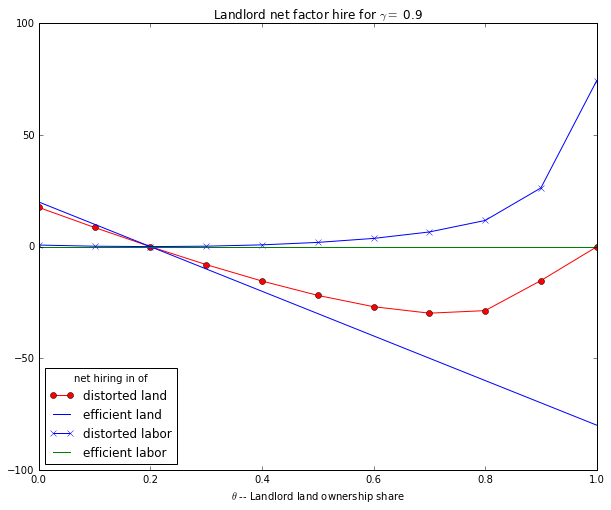

In [10]:
factor_plot(E,Xrc,Xr)

In the example above the 'landlord' farmer was in every way the same as the other farmers, the only difference being he had more land ownership (fraction $\theta$ of the total). He had the same skill parameter as every other farmer. In an efficient equilibrium his operational farm size should therefore be the same size as every other farmer. The plot above shows how monopoly power (which rises with $\theta$ allows the monopolist to distort the economy -- he withholds land from the lease market to drive up the land rental rate and, since this deprives the 'fringe' of farmers of land, lowers the marginal product of labor on each smallholder farm, increasing the smallholder labor supply to the market which pushes down the labor wage.  Hence we see how at higher levels of $\theta$ the landlord expands the size of his estate and establish monopsony power wages.

A key force keeping the landlord from becoming too large is the fact that their are diseconomies of scale in production.  THe landlord is expanding the scale of his operation (raising the land to labor ration on his farm in this example) earn more via distorted factor prices, but he balances off the increase in extraction from disorted wages against the cost of operating an inefficiently large farm (i.e. the cost of being too big). 

Now let's see the effect of making the landlord just a little bit more 'skilled' than the others.  This lowers the cost of being big.  But note that it also makes him bigger at lower theta and makes what I call the 'size monopsony or 'Feenstra' effect matter more..

So let's raise the landlord farmer's productivity 10% relative to the rest of the farmers.

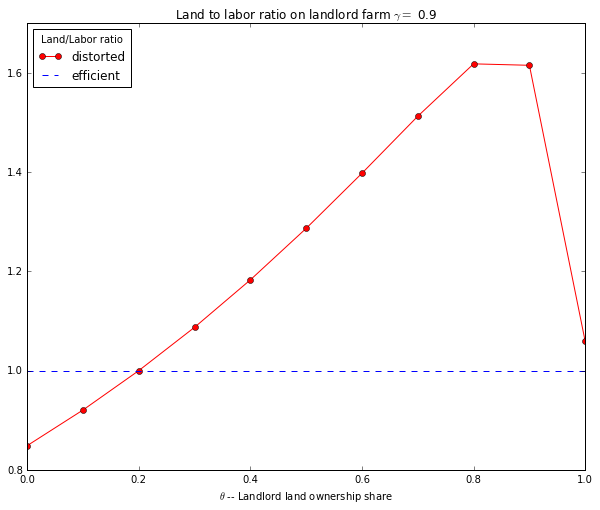

In [11]:
TLratio_plot(E,Xrc,Xr)

In [12]:
E.s[-1]=1.10

Let's recalculate the new equilibria under the different scenarios.

In [13]:
(Xrc,Xr,wc,wr) = scene_print(E,10,detail=True)

Running 10 scenarios...

Assumed Parameters
ALPHA  : 0.5 GAMMA  : 0.9 H      : 0.0 LAMBDA : 0.2
LBAR   : 100 N      : 5 TBAR   : 100 s      : [ 1.   1.   1.   1.   1.1]

Effcient:[ Trc, Lrc]      [rc,wc]       w/r    F( )    [r*Tr]  [w*Lr] 
        [ 39.34, 39.34]  [0.34,0.34]   1.00  | 29.97   13.49    13.49 

Theta  [ Tr, Lr ]      [rM,wM]        w/r  | F()   [T_hire]  [T_sale] [L_hire]
 0.00  [ 30.67, 35.14] [ 0.33, 0.35]  1.07 | 25.47    10.07     0.00    12.33  
 0.10  [ 32.24, 34.54] [ 0.33, 0.35]  1.04 | 25.84    10.76     3.34    11.94  
 0.20  [ 34.32, 34.32] [ 0.34, 0.34]  1.00 | 26.51    11.68     6.80    11.68  
 0.30  [ 37.05, 34.56] [ 0.35, 0.33]  0.96 | 27.52    12.88    10.43    11.55  
 0.40  [ 40.60, 35.31] [ 0.36, 0.33]  0.92 | 28.96    14.50    14.28    11.58  
 0.50  [ 45.23, 36.74] [ 0.37, 0.32]  0.87 | 30.95    16.72    18.48    11.76  
 0.60  [ 51.36, 39.10] [ 0.39, 0.31]  0.80 | 33.70    19.92    23.27    12.11  
 0.70  [ 59.75, 42.98] [ 0.42, 0.29]  0.71 | 37.

G:\E\GitHub\FarmSizePower\FarmSizePower\geqfarm.py:34: RuntimeWarning: invalid value encountered in double_scalars
  MPT = self.ALPHA*self.GAMMA*self.prodn(X,  s)/X[0]
G:\E\GitHub\FarmSizePower\FarmSizePower\geqfarm.py:49: RuntimeWarning: invalid value encountered in double_scalars
  (1-gamma*(1-alpha)))**(1/(gamma-1))
G:\E\GitHub\FarmSizePower\FarmSizePower\geqfarm.py:49: RuntimeWarning: invalid value encountered in power
  (1-gamma*(1-alpha)))**(1/(gamma-1))
G:\E\GitHub\FarmSizePower\FarmSizePower\geqfarm.py:52: RuntimeWarning: invalid value encountered in double_scalars
  (1-gamma*alpha))**(1/(gamma-1))
G:\E\GitHub\FarmSizePower\FarmSizePower\geqfarm.py:52: RuntimeWarning: invalid value encountered in power
  (1-gamma*alpha))**(1/(gamma-1))
G:\E\GitHub\FarmSizePower\FarmSizePower\geqfarm.py:29: RuntimeWarning: invalid value encountered in power
  Y = s*((X[0]**self.ALPHA)*(X[1]**(1-self.ALPHA)))**self.GAMMA
G:\E\GitHub\FarmSizePower\FarmSizePower\geqfarm.py:55: RuntimeWarning: inval

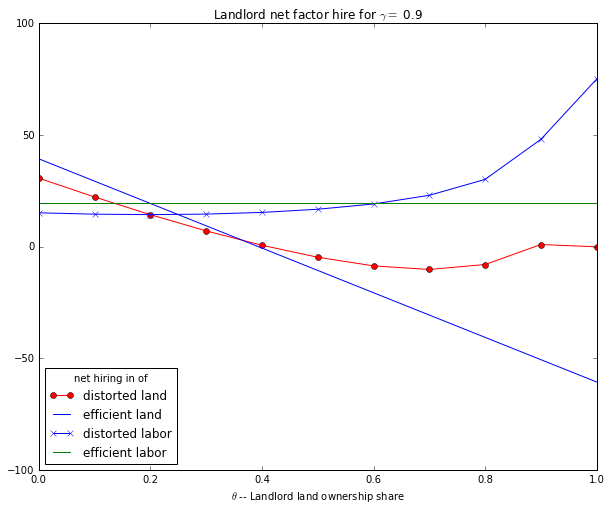

In [14]:
factor_plot(E,Xrc,Xr)

Given that he is more skilled than before the landlord's efficient scale of production has increased. This lowers the cost of being big.  Interestingly at low $\theta$ this leads the landlord to hire less land and labor ...

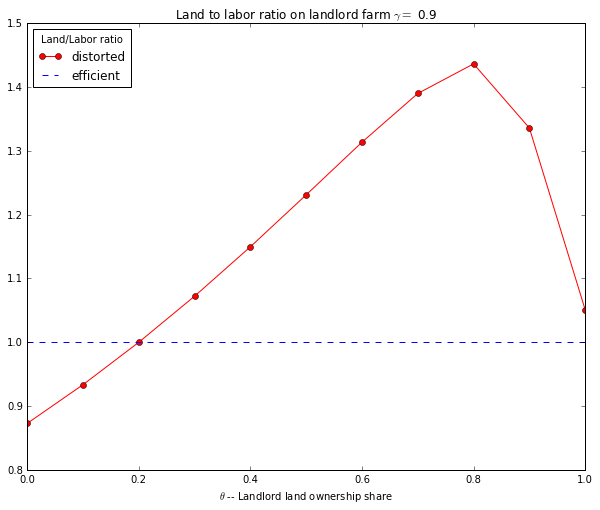

In [15]:
TLratio_plot(E,Xrc,Xr)

NEXT STEPS:
Make the plot routines flexible to take multiple arguments to plot lines side by side e.g. factor_plot(Xrc0,Xr0,Xrc1,Xr1) would plot two scenarios on same figure.

## The Russian Mir

THis is not finished...

 EE(Competitive) and the ED (Latifundia) cases.  For example to find the competitive economy equilibrium we would use:

`EE= Economy(5)`
`res = EE.smallhold_eq([EE.TBAR, EE.LBAR], s, analytic=True)`

EE is an instance of this economy which initializes various things to defaults and the **smallhold_eq** is a method in this class that solves for a competitive equilibrium (it can solve analytically for homothetic case or numerically more generally). If the skill vector s is for the entire economy then the above call gives a competitive equilibrium outcome when landlords have no market power.  The returned result res will be a named tuple that holds equilibrium factor prices (res.w) and equilibrium factor d...(line truncated)...


 now there is also a **MirEconomy** class that inherits from **Economy**.  These are economies where the smallholder sector are described by 
To instead find cartel 'Latifundia' equilibria for a theta of 0,8 we'd instead call on the **cartel_eq** method within the same Economy class:


3/23/15 Have set up a new Class called MirEconomy that inherits all its attributes.  The idea is to just change the methods that describe the smallholder 'subeconomy'.  Rather than assuming a competitive smallholder sector (as in the Economy class) these methods will have same name but the subeconomy will now be a MIR. With that we should then have working ED and DD cases.  I haven't yet rewritten the code but we'd want to rewrite **demands()**, **excessD** and **smallhold_eq**.  **cartel_income** and **car...(line truncated)...